In [32]:
import pandas as pd
pd.TimeSeries=pd.Series
import matplotlib.pylab as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

from google.colab import files
uploaded = files.upload()

Saving India.csv to India (4).csv


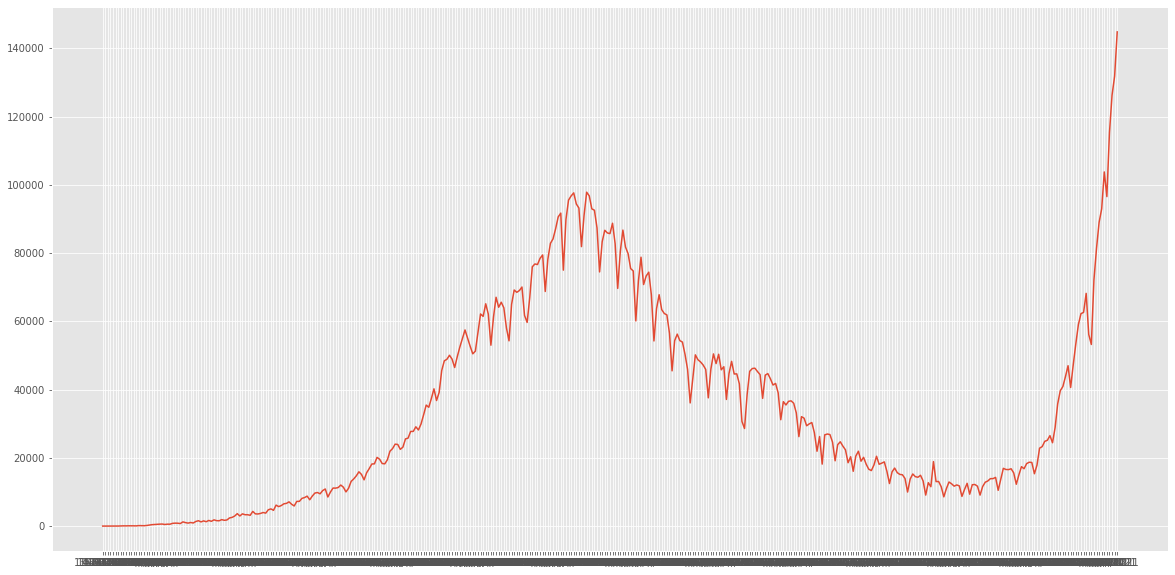

In [33]:
import io

data = pd.read_csv(io.BytesIO(uploaded['India.csv']))
data.head(5)
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

#data['Date']=pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)
#data.plot()
x=data['Date']
y=data['Daily confirmed']
plt.plot(x,y)

In [34]:
ts = pd.Series(data['Daily confirmed'].values, index=data['Date'])
ts_log=np.log(ts)
ts_log.head()

Date
13-03-2020    2.302585
14-03-2020    2.397895
15-03-2020    2.302585
16-03-2020    2.639057
17-03-2020    2.995732
dtype: float64

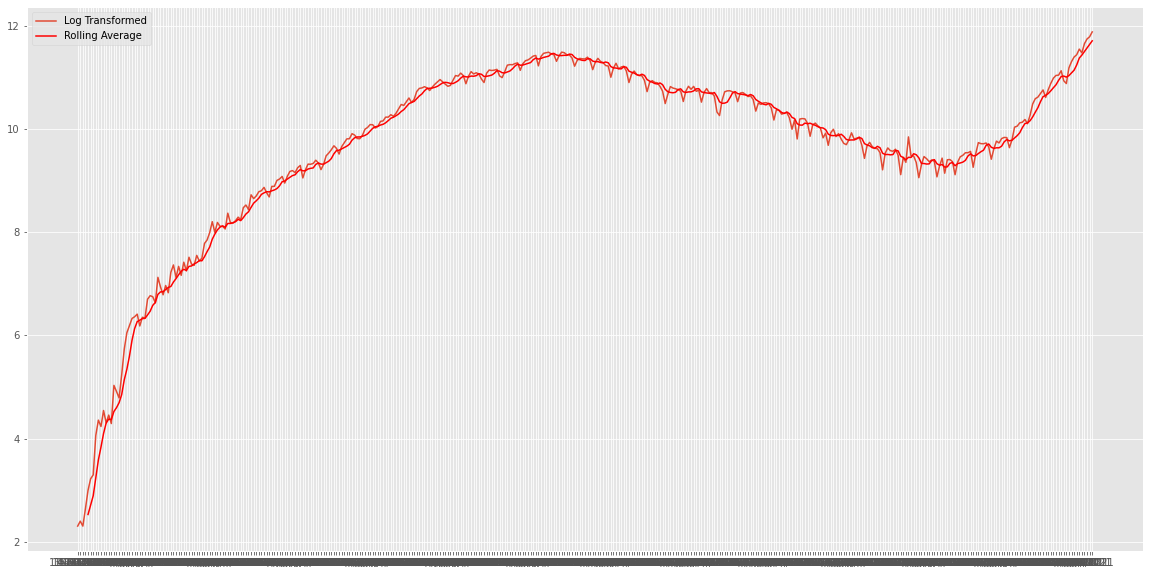

In [36]:
Rolling_average = ts_log.rolling(window = 5, center= False).mean()
plt.plot(ts_log, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average') 
plt.legend(loc = 'best')

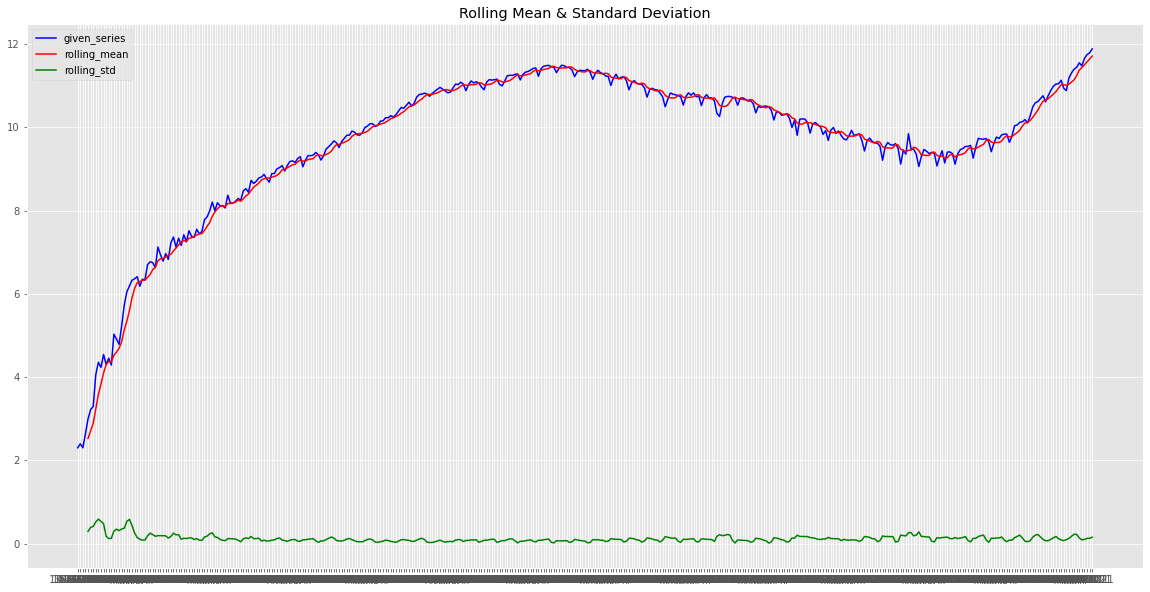

Results of Dickey-Fuller Test:
Test Statistic                  -0.734362
p-value                          0.837647
#Lags Used                      15.000000
Number of Observations Used    377.000000
Critical Value (1%)             -3.447815
Critical Value (5%)             -2.869237
Critical Value (10%)            -2.570870
dtype: float64


In [37]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 5,center=False).mean()
    r_std = input_data.rolling(window = 5,center=False).std()

    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_for_stationary(ts_log)

In [38]:
log_Rolling_difference = ts_log - Rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

Date
31-03-2021    0.150085
1/4/2021      0.218758
2/4/2021      0.255030
3/4/2021      0.197776
4/4/2021      0.174118
5/4/2021      0.043519
6/4/2021      0.151306
7/4/2021      0.172220
8/4/2021      0.145759
9/4/2021      0.172806
dtype: float64

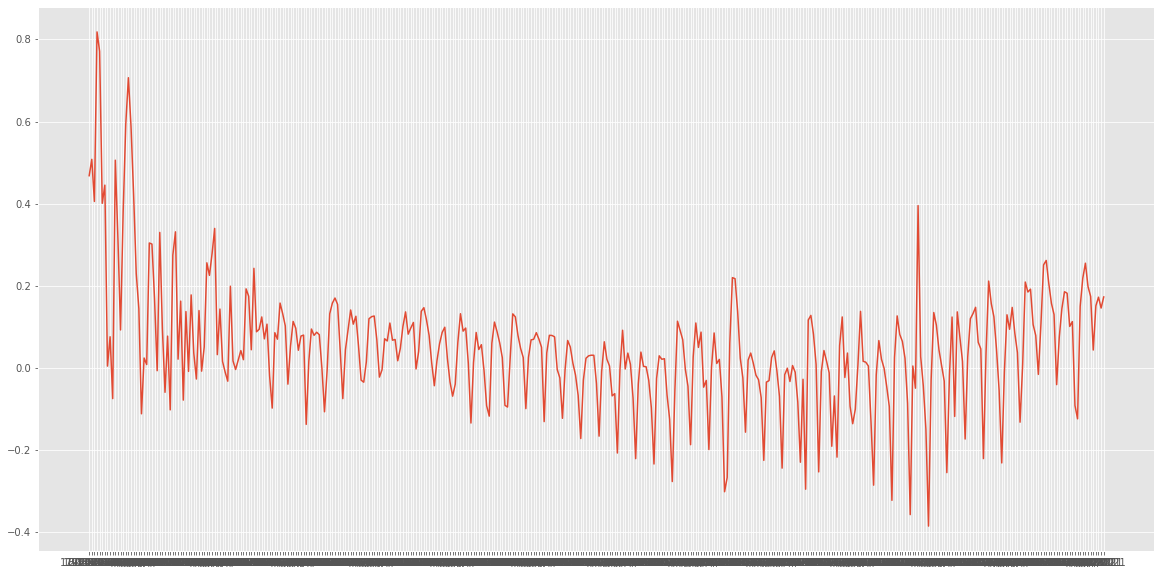

In [39]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)

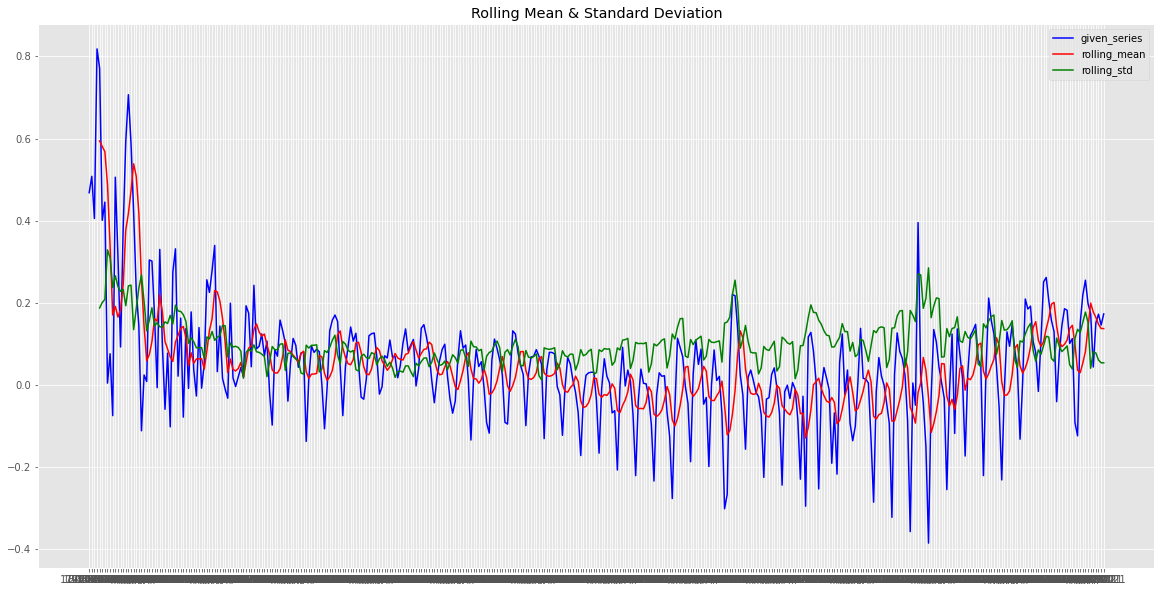

Results of Dickey-Fuller Test:
Test Statistic                  -4.663258
p-value                          0.000099
#Lags Used                      15.000000
Number of Observations Used    373.000000
Critical Value (1%)             -3.448004
Critical Value (5%)             -2.869320
Critical Value (10%)            -2.570915
dtype: float64


In [40]:
test_for_stationary(log_Rolling_difference)

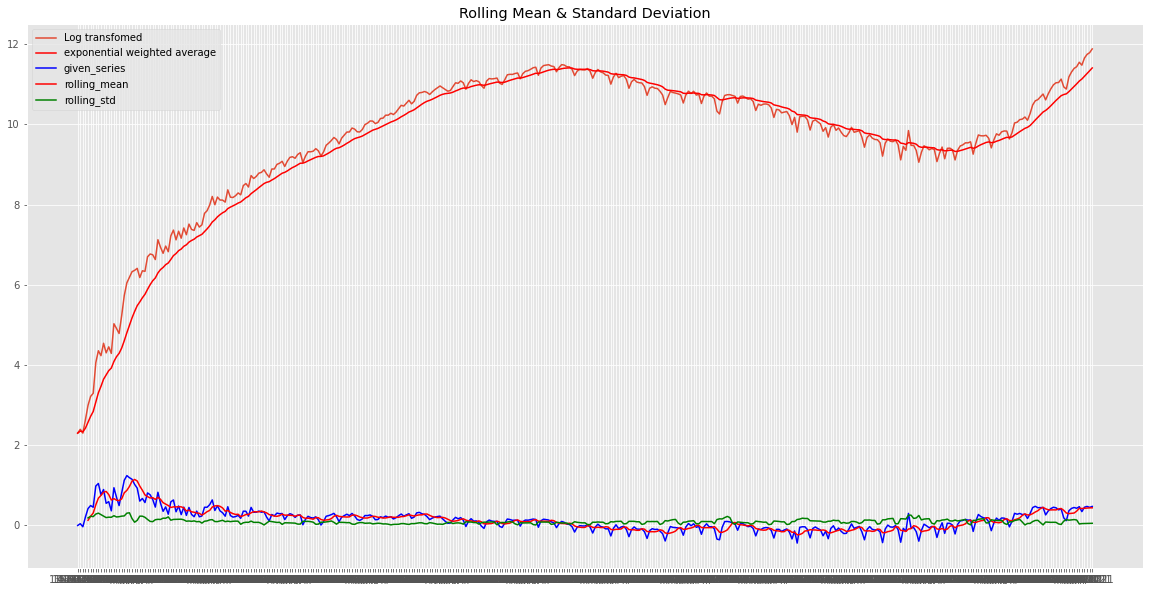

Results of Dickey-Fuller Test:
Test Statistic                  -2.785750
p-value                          0.060338
#Lags Used                      15.000000
Number of Observations Used    377.000000
Critical Value (1%)             -3.447815
Critical Value (5%)             -2.869237
Critical Value (10%)            -2.570870
dtype: float64


In [41]:
expwighted_avg = ts_log.ewm(halflife=5,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_log, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')
log_expmovwt_diff = ts_log - expwighted_avg

test_for_stationary(log_expmovwt_diff)

Date
13-03-2020         NaN
14-03-2020         NaN
15-03-2020         NaN
16-03-2020         NaN
17-03-2020         NaN
18-03-2020    0.916291
19-03-2020    0.897942
20-03-2020    1.757858
21-03-2020    1.717651
22-03-2020    1.238374
dtype: float64

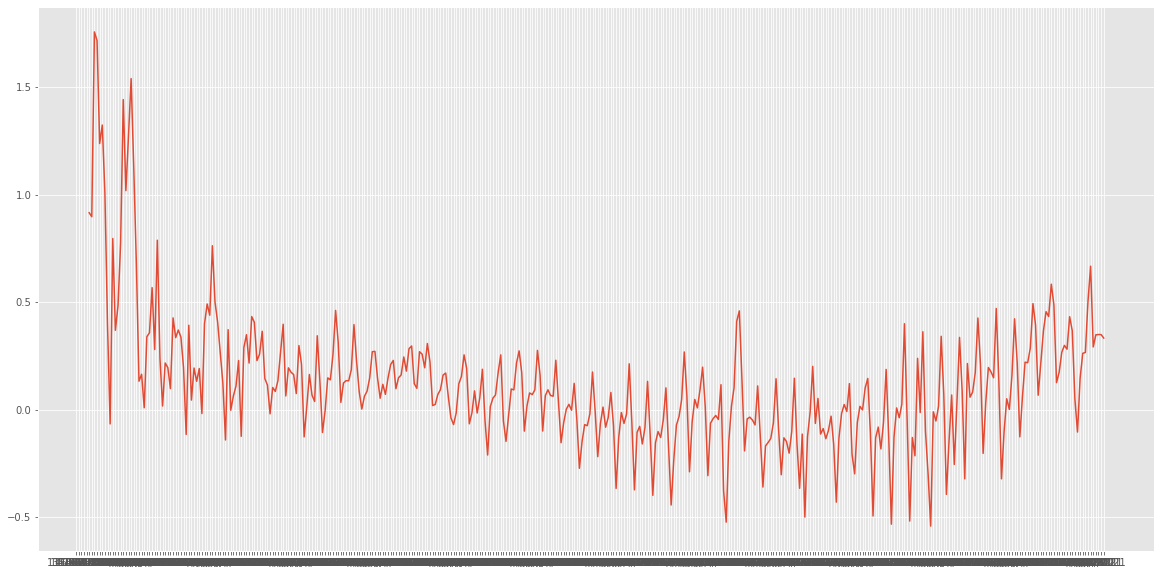

In [42]:
ts_diff_logtrans = ts_log -ts_log.shift(5)
plt.plot(ts_diff_logtrans)
ts_diff_logtrans.head(10)

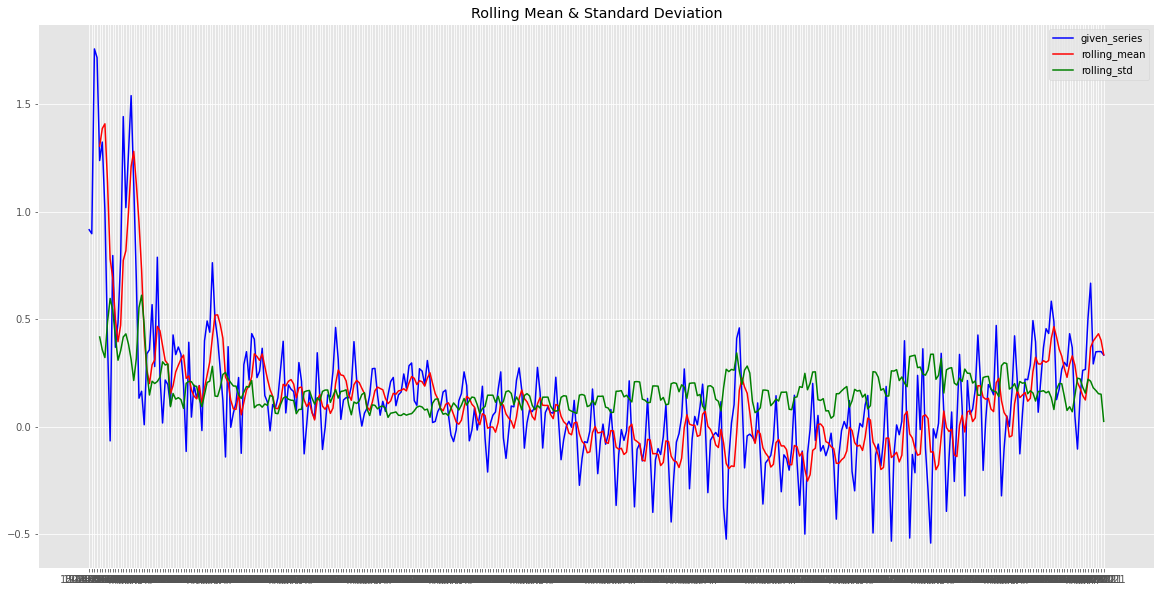

Results of Dickey-Fuller Test:
Test Statistic                  -5.285297
p-value                          0.000006
#Lags Used                      16.000000
Number of Observations Used    371.000000
Critical Value (1%)             -3.448100
Critical Value (5%)             -2.869362
Critical Value (10%)            -2.570937
dtype: float64


In [43]:
ts_diff_logtrans.dropna(inplace=True)
test_for_stationary(ts_diff_logtrans)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


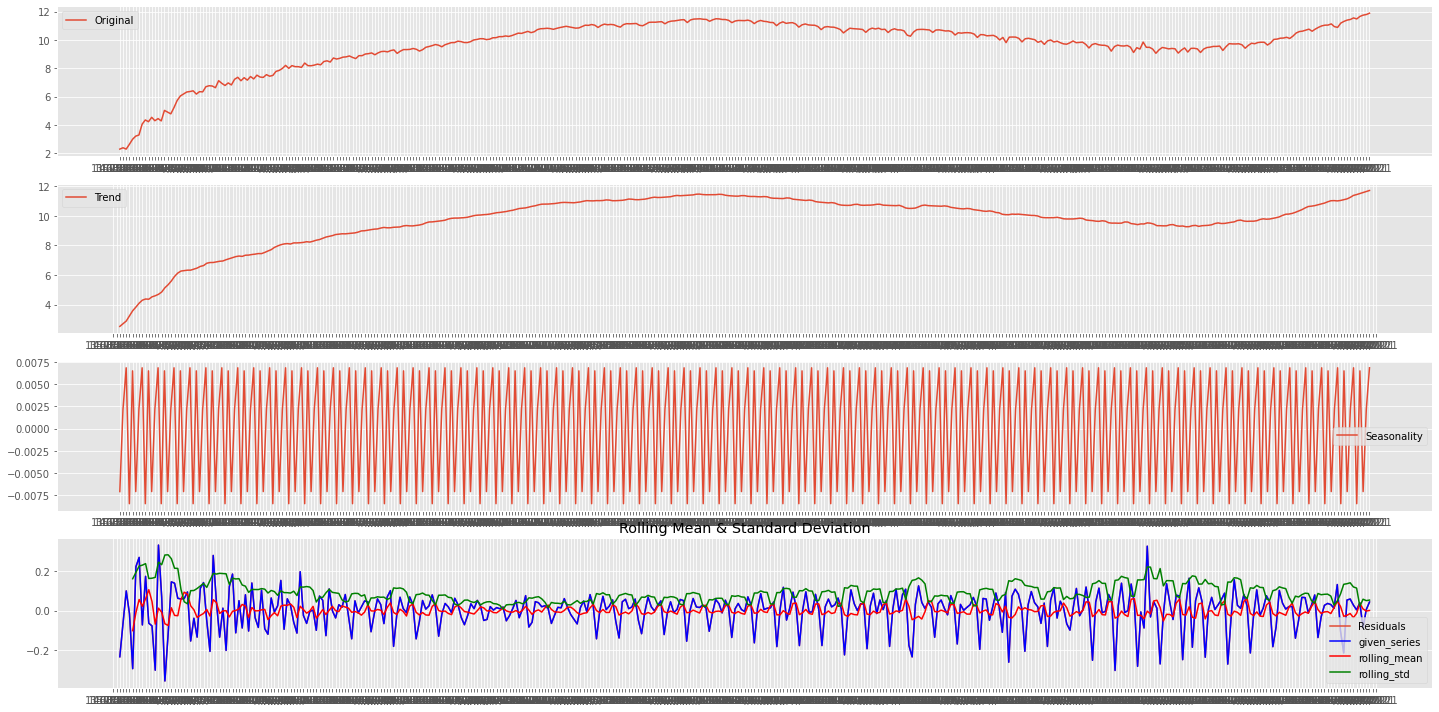

Results of Dickey-Fuller Test:
Test Statistic                -8.523573e+00
p-value                        1.084203e-13
#Lags Used                     1.400000e+01
Number of Observations Used    3.740000e+02
Critical Value (1%)           -3.447956e+00
Critical Value (5%)           -2.869299e+00
Critical Value (10%)          -2.570903e+00
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


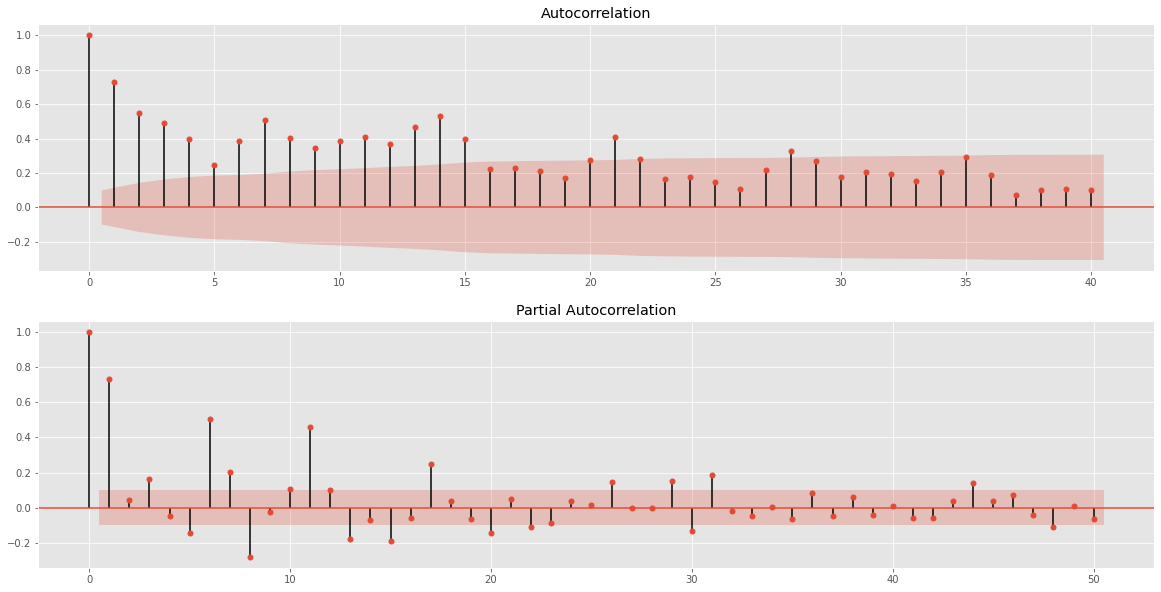

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
decomposition = seasonal_decompose(ts_log,freq=5)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
decomposed_TS = residual
decomposed_TS.dropna(inplace=True)
test_for_stationary(decomposed_TS)
lag_acf = acf(ts_diff_logtrans, nlags=30)
lag_pacf = pacf(ts_diff_logtrans, nlags=50, method='ols')
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

In [66]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.4MB/s 
     |████████████████████████████████| 2.1MB 15.4MB/s 
     |████████████████████████████████| 9.5MB 24.5MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [45]:
from pmdarima import auto_arima

In [23]:
ts_data = pd.Series(data['Daily confirmed'].values, index=data['Date'])

ts_log_data = np.log(ts_data)
model_autoARIMA = auto_arima(ts_log_data, start_p=0, start_q=0,
                      test='adf',       
                      max_p=8, max_q=8, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2913.463, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-342.382, Time=0.46 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-336.800, Time=0.73 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-340.995, Time=0.36 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-341.088, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-341.659, Time=0.68 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 3.923 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  393
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 174.191
Dat

In [46]:
model =ARMA(ts_log,order=(1,1)).fit()
print(model.k_ar)

1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [47]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  393
Model:                     ARMA(1, 1)   Log Likelihood                 174.829
Method:                       css-mle   S.D. of innovations              0.154
Date:                Sun, 11 Apr 2021   AIC                           -341.659
Time:                        10:45:16   BIC                           -325.764
Sample:                             0   HQIC                          -335.360
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2964      4.385      1.664      0.096      -1.298      15.891
ar.L1.y        0.9996      0.001   1657.669      0.000       0.998       1.001
ma.L1.y       -0.1215      0.048     -2.549      0.0

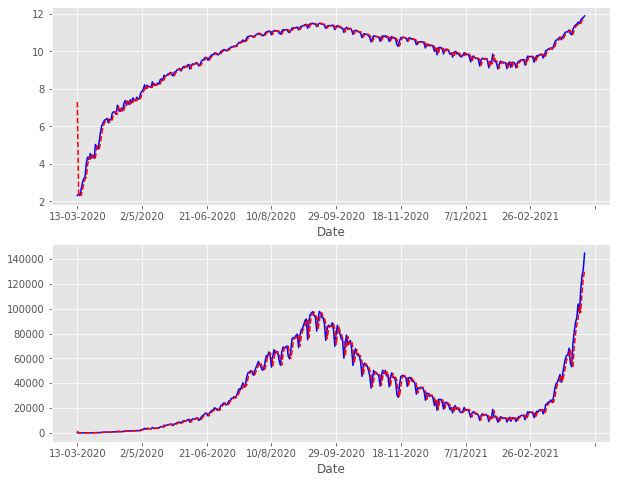

In [48]:
y_pred = model.predict(ts_log_data.index[0], ts_log_data.index[-1])
#y_pred.head(20)
fig, axes = plt.subplots(figsize=(10,8), nrows=2)
ts_log_data.plot(ax=axes[0], style='b-', label='actual')
y_pred.plot(ax=axes[0], style='r--', label='in-sample fit')

ts_data.plot(ax=axes[1], style='b-', label='actual')
np.exp(y_pred).plot(ax=axes[1], style='r--', label='in-sample fit')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


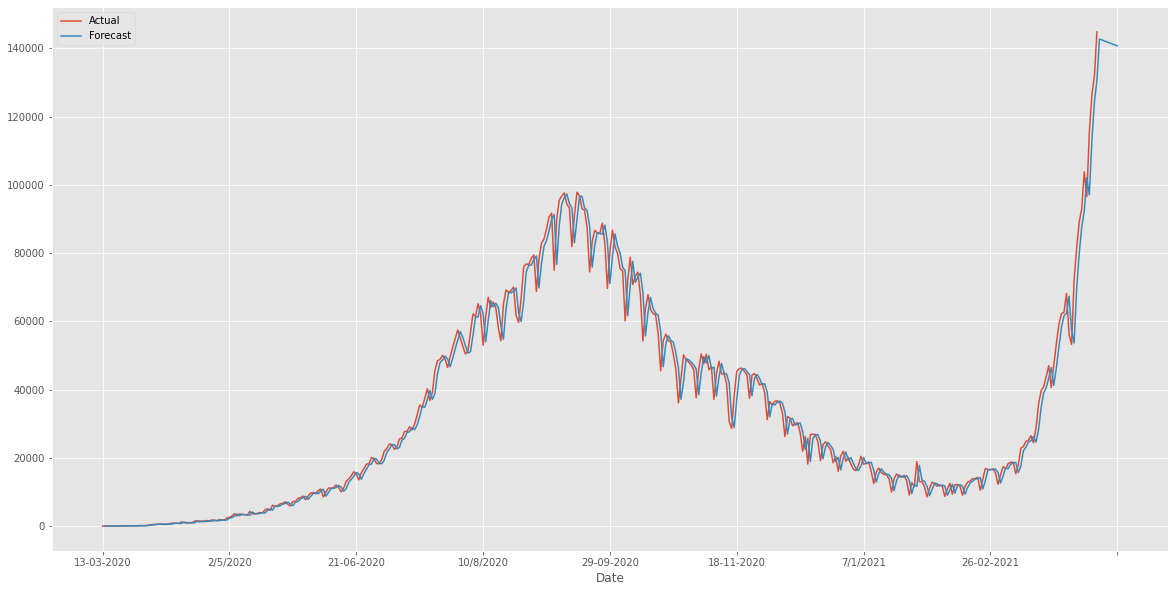

In [50]:
np.exp(ts_log).plot()
np.exp(model.predict(1,400,typ='levels')).plot()
plt.legend(['Actual','Forecast'])
plt.show()

In [ ]:
#cor(fitted(model),ts_data)
np.corrcoef(np.exp(y_pred),ts_data)**2

array([[1.        , 0.97751467],
       [0.97751467, 1.        ]])